In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./dataset/d2arteezy/2ez4rtz - Arteezy 11.000 MMR in Dota 2 ....jpg')

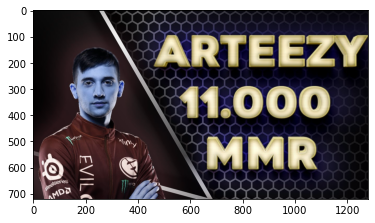

In [4]:
if img is not None:
    plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(720, 1280)

In [6]:
gray

array([[ 9,  9,  9, ...,  5,  6,  7],
       [ 9,  9,  9, ...,  5,  7,  9],
       [ 9,  9,  9, ...,  5,  8, 11],
       ...,
       [25, 25, 26, ..., 26, 26, 28],
       [25, 25, 26, ..., 32, 28, 21],
       [25, 25, 25, ..., 30, 27, 25]], dtype=uint8)

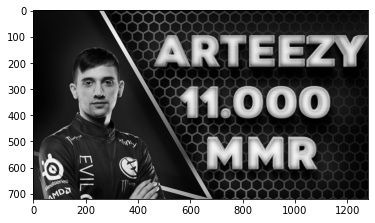

In [7]:
plt.imshow(gray,cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray)

In [9]:
(x,y,w,h)=faces[0]
x,y,w,h

(138, 188, 220, 220)

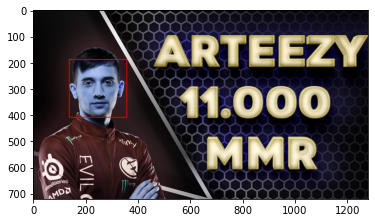

In [10]:
face_img=cv2.rectangle(img,(x,y,),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

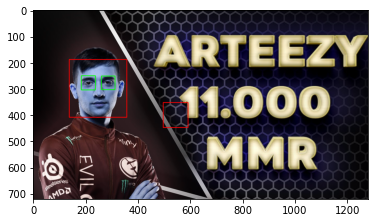

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    test=[]
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray)

    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
                 test.append(roi_color)
    return test  

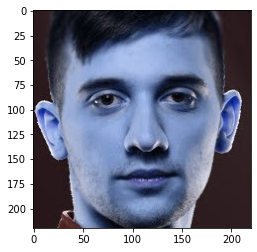

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/d2arteezy/2ez4rtz - Arteezy 11.000 MMR in Dota 2 ....jpg')
for i in range(len(cropped_image)):
    plt.imshow(cropped_image[i])

In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [18]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path) 

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
player_file_name = {}

for img_dir in img_dirs:
    count = 1
    player_name = img_dir.split('/')[-1]
    print(player_name)
    player_file_name[player_name]=[]

    
    for entry in os.scandir(img_dir):
        print(entry.path)
        img =cv2.imread(entry.path)
        if img is not None:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data+player_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            for i in range(len(roi_color)):    
                cropped_file_name = player_name +str(count)+".png"
                cropped_file_path=cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path,roi_color[i])
                player_file_name[player_name].append(cropped_file_path)
                count+=1

d2arteezy
./dataset/d2arteezy\20-20_ EG.Arteezy Answers.jpg
Generating cropped images in folder:  ./dataset/cropped/d2arteezy
./dataset/d2arteezy\2ez4rtz - Arteezy 11.000 MMR in Dota 2 ....jpg
./dataset/d2arteezy\A conversation with an Evil Genius....jpg
./dataset/d2arteezy\Arteezy (Esports Player) Wiki_ Bio....jpg
./dataset/d2arteezy\Arteezy - Artour Babaev - DOTABUFF....jpg
./dataset/d2arteezy\Arteezy - Dota 2 Wiki.jpg
./dataset/d2arteezy\ARTEEZY - Info_ Stats and Clips....jpg
./dataset/d2arteezy\Arteezy - Liquipedia Dota 2 Wiki (1).jpg
./dataset/d2arteezy\Arteezy - Liquipedia Dota 2 Wiki (2).jpg
./dataset/d2arteezy\Arteezy - Liquipedia Dota 2 Wiki.jpg
./dataset/d2arteezy\Arteezy - Luna Highlights _ Dota 2 Pro....jpg
./dataset/d2arteezy\Arteezy - Outworld Destroyer Highlights....jpg
./dataset/d2arteezy\Arteezy - Slardar Safelane _ Typical....jpg
./dataset/d2arteezy\Arteezy - Twitch Streamer Profile & Bio....jpg
./dataset/d2arteezy\Arteezy - Twitch.jpg
./dataset/d2arteezy\Arteezy - Wi

./dataset/d2arteezy\The _18 million Dota 2 International....jpg
./dataset/d2arteezy\This is the Best Dota 2 Midlaner in the_yyth....jpg
./dataset/d2arteezy\Top 10 Dota 2 Players of all time.jpg
./dataset/d2arteezy\Top NA Dota 2 Pros to Compete in a Tw....jpg
./dataset/d2arteezy\Twitter_ Dota 2_ Girlfriend_ Net Worth....jpg
./dataset/d2arteezy\Two Unreleased Interviews with Arteezy....jpg
./dataset/d2arteezy\Update Patch _ Dota 2 Pro MMR Gameplay....jpg
./dataset/d2arteezy\WePlay AniMajor_ Arteezy_ Miracle shine....jpg
./dataset/d2arteezy\WESG Canadian qualifiers_ challenge....jpg
./dataset/d2arteezy\When EG forgot Arteezy in Russia _ r_DotA2.jpg
./dataset/d2arteezy\Where can I buy Arteezy headband from....jpg
./dataset/d2arteezy\who is the best hard carry in Dota 2....jpg
./dataset/d2arteezy\Young Arteezy_ _ r_DotA2.jpg
./dataset/d2arteezy\Zai firing shots at Arteezy and Fear....jpg
./dataset/d2arteezy\‡πÇ‡∏î‡∏ô‡∏ï‡∏Å‡πÑ‡∏õ‡∏≠‡∏µ‡∏Å‡∏´‡∏ô‡∏∂‡πà‡∏á__ Arteezy ‡∏ñ‡∏π‡∏Å‡πÄ‡∏ú‡∏¢‡∏ß‡πà‡∏≤‡

./dataset/d2iceiceice\tier list for Dota 2_s best SEA players....jpg
./dataset/d2iceiceice\Top 5 off-lane Dota 2 players in the....jpg
./dataset/d2iceiceice\When playing Dota 2 is serious business....jpg
./dataset/d2iceiceice\Where are Singapore_s Dota 2 Pioneers now_.jpg
./dataset/d2iceiceice\Will iceiceice elevate Evil Geniuses to....jpg
./dataset/d2iceiceice\–ü—Ä–æ—Ñ–∏–ª—å –∏–≥—Ä–æ–∫–∞ iceiceice –ø–æ Dota 2....jpg
d2miracle
./dataset/d2miracle\10 Facts about Miracle from Team Liquid....jpg
Generating cropped images in folder:  ./dataset/cropped/d2miracle
./dataset/d2miracle\34k gold comeback against Fnatic....jpg
./dataset/d2miracle\Amer Al-Barkawi ·êâ Dota 2 ·êä Miracle....jpg
./dataset/d2miracle\Amer _Miracle_ Barqawi (_liquid_miracle....jpg
./dataset/d2miracle\Amer ¬´Miracle-¬ª Al-barqawi Dota 2....jpg
./dataset/d2miracle\AniMajor as Nigma beat Virtus.pro ....jpg
./dataset/d2miracle\Best Dota 2 players 2016_ The top 8....jpg
./dataset/d2miracle\Best Info Dota2_ Dota 2 Lifestealer

./dataset/d2puppey\Dota 2 Animajor_ DPC Season Wrap....jpg
./dataset/d2puppey\Dota 2 Feature_ Puppey at TI10_ _It is....jpg
./dataset/d2puppey\Dota 2 Feature_ Puppey Power_ TI_s ONLY....jpg
./dataset/d2puppey\DOTA 2 on Twitter_ _Captains Puppey and....jpg
./dataset/d2puppey\Dota 2 Singapore Tournament By ONE....jpg
./dataset/d2puppey\Dota 2 Team Secret _ iTech Post.jpg
./dataset/d2puppey\Dota 2_ Clement _Puppey_ Ivanov TEDx....jpg
./dataset/d2puppey\Dota 2_ Puppey and Kuroky -- The... (1).jpg
./dataset/d2puppey\Dota 2_ Puppey and Kuroky -- The....jpg
./dataset/d2puppey\Dota 2_ Team Secret To Take Break Until....jpg
./dataset/d2puppey\Dota 2_ TI10 Team Secret Update_ Puppey....jpg
./dataset/d2puppey\DotA News_ Puppey_s state of Nirvana....jpg
./dataset/d2puppey\DOTA2 TI3 - Na_vi.Puppey hugs Fan like ....jpg
./dataset/d2puppey\Dota2-TI10_ Counting the few remaining....jpg
./dataset/d2puppey\Download puppey images for free (1).jpg
./dataset/d2puppey\Download puppey images for free.jpg
./d

./dataset/d2zai\ex-TeamSecret Zai now in Team Liquid....jpg
./dataset/d2zai\Goodbye Secret.Zai ‚Äî hello Liquid.Zai ....jpg
./dataset/d2zai\I got Zai to smile (almost) _ Dota 2....jpg
./dataset/d2zai\I just found this picture of zai from....jpg
./dataset/d2zai\Identify Zai in the pic _ r_DotA2.jpg
./dataset/d2zai\Interview with EG.Zai and EG.Arteezy ....jpg
./dataset/d2zai\Kiev Major_ EG ground Thunderbirds....jpg
./dataset/d2zai\LiquidÂÆòÊñπÂÆ£Â∏ÉzaiÂä†ÂÖ•DOTA2Èòü‰ºç.jpg
./dataset/d2zai\Ludwig _zai_ W√•hlberg Team Liquid Dota....jpg
./dataset/d2zai\Ludwig ¬´Zai¬ª Wahlberg Dota 2_ player....jpg
./dataset/d2zai\Pro Players Gameplay _ Spotnet Dota....jpg
./dataset/d2zai\Qojqva Switches to Full-Time Streaming....jpg
./dataset/d2zai\Reddit Dota 2 on Twitter_ _What if some....jpg
./dataset/d2zai\RIP ZAI the grill _ Dota 2_ DotA_ MOBA_yythk....jpg
./dataset/d2zai\Sand King performance LUL _ r_DotA2.jpg
./dataset/d2zai\School_s Out_ Zai is Back.jpg
./dataset/d2zai\Secret.zai Axe [25_3_9] - Do

In [22]:
player_file_name = {}
for img_dir in cropped_image_dirs:
    player_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    player_file_name[player_name] = file_list
player_file_name

{'d2arteezy': ['./dataset/cropped/d2arteezy\\d2arteezy1.png',
  './dataset/cropped/d2arteezy\\d2arteezy10.png',
  './dataset/cropped/d2arteezy\\d2arteezy100.png',
  './dataset/cropped/d2arteezy\\d2arteezy101.png',
  './dataset/cropped/d2arteezy\\d2arteezy102.png',
  './dataset/cropped/d2arteezy\\d2arteezy103.png',
  './dataset/cropped/d2arteezy\\d2arteezy104.png',
  './dataset/cropped/d2arteezy\\d2arteezy105.png',
  './dataset/cropped/d2arteezy\\d2arteezy108.png',
  './dataset/cropped/d2arteezy\\d2arteezy109.png',
  './dataset/cropped/d2arteezy\\d2arteezy11.png',
  './dataset/cropped/d2arteezy\\d2arteezy111.png',
  './dataset/cropped/d2arteezy\\d2arteezy112.png',
  './dataset/cropped/d2arteezy\\d2arteezy113.png',
  './dataset/cropped/d2arteezy\\d2arteezy114.png',
  './dataset/cropped/d2arteezy\\d2arteezy116.png',
  './dataset/cropped/d2arteezy\\d2arteezy12.png',
  './dataset/cropped/d2arteezy\\d2arteezy121.png',
  './dataset/cropped/d2arteezy\\d2arteezy122.png',
  './dataset/cropped/d2

In [23]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [25]:
class_dict = {}
count = 0
for player_name in player_file_name.keys():
    class_dict[player_name] = count
    count = count + 1
class_dict

{'d2arteezy': 0, 'd2iceiceice': 1, 'd2miracle': 2, 'd2puppey': 3, 'd2zai': 4}

In [27]:
x=[]
y=[]
for player_name, training_files in player_file_name.items():
    for training_image in training_files:
        img =cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har =w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[player_name])
        

In [28]:
len(y)

382

In [29]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(382, 4096)

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 4)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7604166666666666

In [32]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.83      0.91      0.87        22
           2       0.86      0.67      0.75         9
           3       0.57      0.80      0.67        20
           4       1.00      0.53      0.69        19

    accuracy                           0.76        96
   macro avg       0.81      0.74      0.75        96
weighted avg       0.80      0.76      0.76        96



In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score  \
0                  svm    0.755717   
1        random_forest    0.583908   
2  logistic_regression    0.755414   

                                    best_params  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                 {'logisticregression__C': 10}

In [36]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [37]:
best_estimators['svm'].score(X_test,y_test)

0.8229166666666666

In [38]:
best_estimators['random_forest'].score(X_test,y_test)

0.5729166666666666

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7604166666666666

In [40]:
best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[21,  1,  1,  1,  2],
       [ 1, 21,  0,  0,  0],
       [ 0,  0,  9,  0,  0],
       [ 1,  0,  1, 18,  0],
       [ 3,  1,  0,  5, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

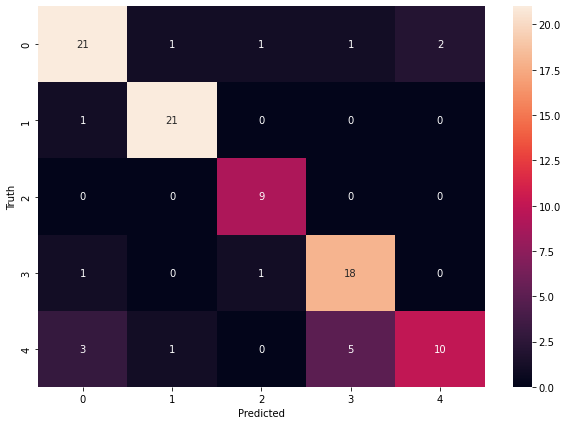

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [44]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))